### PROBLEM STMT:

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df_test= pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [4]:
df_test.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN


In [5]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

# merge both  the data sets 

df_final = pd.merge(df_train,df_test,how = 'left')
df_final

In [6]:
final_df = df_train.append(df_test)
final_df.head(4)

C:\Users\HP\AppData\Local\Temp\ipykernel_6428\2927829381.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0


In [7]:
final_df.shape

(783667, 12)

In [8]:
#see which feature not much important for our analysis 

final_df.drop(['User_ID'],axis=1,inplace = True)

In [9]:
final_df.head(6)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0


In [10]:
#let see here Gender are in categorical type so to convert into a way so model can take this value ,
#'see how we can do this '

final_df['Gender'] = final_df['Gender'].map({'F': 0,'M': 1})       


In [11]:
final_df.head(4)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0


In [12]:
df = pd.get_dummies(final_df['City_Category'],drop_first = True)

In [13]:
#now murge df to original dataframe
final_df = pd.concat([final_df,df],axis=1)


In [14]:
final_df.drop(['City_Category'],axis=1
            )

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0-17,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0-17,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0-17,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0-17,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,55+,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,26-35,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,26-35,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,46-50,1,4+,0,10,16.0,NaN,NaN,0,1


In [15]:
final_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
final_df['Age']=final_df['Age'].map({'0-17':1,
                                     '18-25':2,
                                     '26-35':3,
                                     '36-45':4,
                                     '46-50':5,
                                     '51-55':6})

In [17]:
final_df['Age']

0         1.0
1         1.0
2         1.0
3         1.0
4         NaN
         ... 
233594    3.0
233595    3.0
233596    3.0
233597    5.0
233598    5.0
Name: Age, Length: 783667, dtype: float64

In [18]:
#look at age feature so change it to app

final_df['Age'] = final_df['Age'].map({'0-17':1,
                                       '18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6})

In [19]:
final_df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,NaN,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,NaN,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,NaN,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,NaN,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,NaN,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,NaN,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,NaN,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,NaN,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [38]:
final_df['B']=df['B'].astype(int)
final_df['C']=df['C'].astype(int)

In [20]:
final_df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
mode_p2 = final_df['Product_Category_2'].mode()[0]

In [22]:
#Nan value in product_category_2 is filled with its mode 
final_df['Product_Category_2'] = final_df['Product_Category_2'].fillna(mode_p2)

In [23]:
final_df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [24]:
mode_p3 = final_df['Product_Category_3'].mode()[0]

In [25]:
final_df['Product_Category_3'] = final_df['Product_Category_3'].fillna(mode_p3) 

<AxesSubplot:>

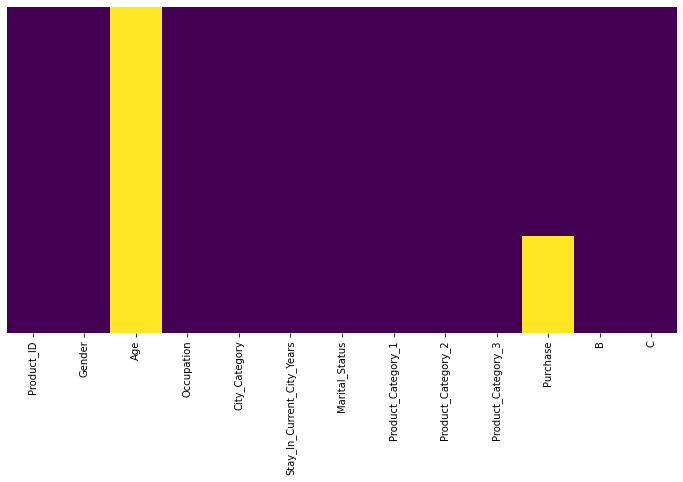

In [26]:
import matplotlib
matplotlib.rcParams['figure.figsize']= (12,6)
sns.heatmap(final_df.isnull(), yticklabels= False,cbar = False , cmap = 'viridis')

In [27]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
#change this 4+ to only 4 

final_df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\HP\AppData\Local\Temp\ipykernel_6428\1525632823.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df['Stay_In_Current_City_Years'].str.replace('+','')


0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [29]:
final_df['Stay_In_Current_City_Years'].info()

<class 'pandas.core.series.Series'>
Int64Index: 783667 entries, 0 to 233598
Series name: Stay_In_Current_City_Years
Non-Null Count   Dtype 
--------------   ----- 
783667 non-null  object
dtypes: object(1)
memory usage: 12.0+ MB


In [30]:
#here data type is object we need to convert this into integer
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].astype(int)

ValueError: invalid literal for int() with base 10: '4+'

In [ ]:
final_df.columns

In [ ]:
##data is not ready for visualisation ,, ;ets explore data through visualisation 

sns.barplot(x='Age',y='Purchase',hue = 'Gender',data=final_df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

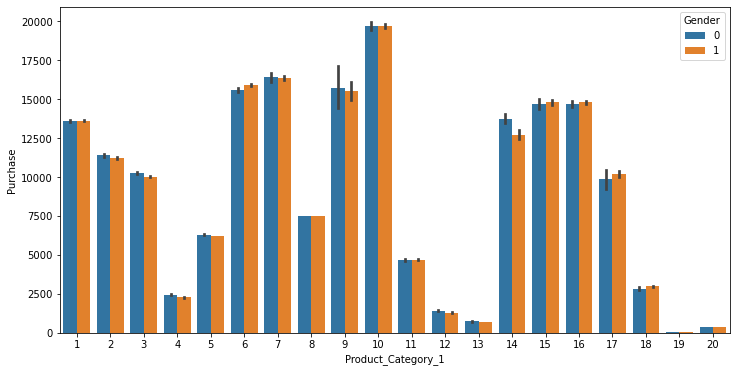

In [31]:
sns.barplot(x='Product_Category_1',y='Purchase',hue = 'Gender',data=final_df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

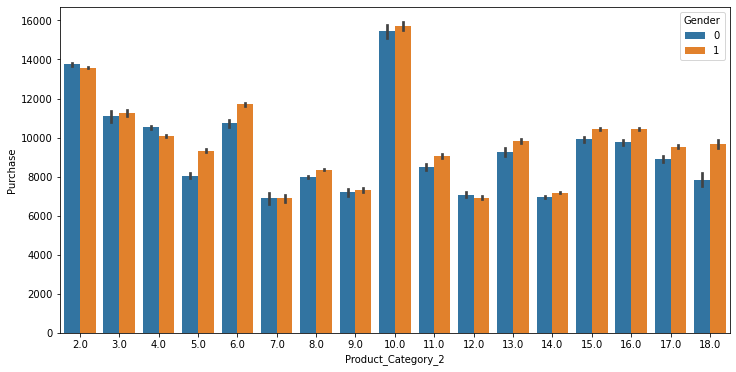

In [32]:
sns.barplot(x='Product_Category_2',y='Purchase',hue = 'Gender',data=final_df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

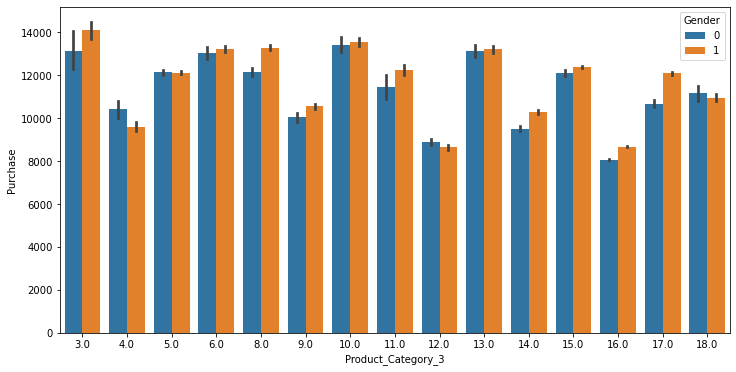

In [33]:
sns.barplot(x='Product_Category_3',y='Purchase',hue = 'Gender',data=final_df)

In [34]:
#feature Scaling 

df_test = final_df[final_df['Purchase'].isnull()]

In [35]:
df_train = final_df[~final_df['Purchase'].isnull()]

In [36]:
df_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,NaN,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,NaN,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,NaN,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,NaN,16,C,4+,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,NaN,13,B,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,NaN,1,C,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,NaN,15,B,4+,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,NaN,1,C,2,0,20,8.0,16.0,365.0,0,1
